In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

/Users/maidat/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
denver_list = pd.read_csv(
    "/Users/maidat/Downloads/Privy/CSV/red_denver_property_listings.csv",
    low_memory=False)

In [3]:
denver_list_clean = denver_list.copy()
denver_list_clean = denver_list.dropna(axis=1,how='all')
denver_list_clean = denver_list.dropna(how='all')

In [4]:
denver_list_clean.shape

(1135542, 69)

In [5]:
denver_list_clean.columns

Index(['id', 'property_id', 'listing_number', 'status_changed_on',
       'created_at', 'updated_at', 'status', 'listed_on', 'contracted_on',
       'off_market_on', 'sold_on', 'list_price', 'sold_price',
       'original_list_price', 'previous_price', 'seller_concessions',
       'above_grade_square_feet', 'total_square_feet', 'finished_square_feet',
       'derived_basement_square_feet', 'car_storage', 'car_spaces', 'garages',
       'beds', 'baths', 'area', 'subdivision', 'street', 'city', 'state',
       'zip', 'county', 'property_key', 'externally_last_updated_at', 'photos',
       'photos_pulled', 'structural_style', 'property_type', 'architecture',
       'year_built', 'lot_size_square_feet', 'lot_size_acres',
       'basement_finished_status', 'basement_finished_pct',
       'basement_square_feet', 'basement_size', 'basement_type', 'seller_type',
       'public_remarks', 'description', 'lat', 'lng', 'zoned',
       'showings_phone', 'listing_agent', 'listing_brokerage', 'versio

In [6]:
denver_list_clean.head()

,id,property_id,listing_number,status_changed_on,created_at,updated_at,status,listed_on,contracted_on,off_market_on,sold_on,list_price,sold_price,original_list_price,previous_price,seller_concessions,above_grade_square_feet,total_square_feet,finished_square_feet,derived_basement_square_feet,car_storage,car_spaces,garages,beds,baths,area,subdivision,street,city,state,zip,county,property_key,externally_last_updated_at,photos,photos_pulled,structural_style,property_type,architecture,year_built,lot_size_square_feet,lot_size_acres,basement_finished_status,basement_finished_pct,basement_square_feet,basement_size,basement_type,seller_type,public_remarks,description,lat,lng,zoned,showings_phone,listing_agent,listing_brokerage,version,approval_condition,structural_type,is_attached,stories,parcel_number,hoa_name,hoa_fee,school_district,private_remarks,price_changes,unit_count,county_data_id
0,1,NaN,476750,2007-03-31,2011-04-16 20:13:20,2020-11-03 02:09:42,sold,2007-02-26,2007-03-24,2007-03-27,2007-03-31,319900.0,319000.0,319900.0,NaN,0,2116.0,3120.0,3120.0,1004,"G,A",2.0,2.0,4.0,4.0,NaN,MEADOWS THE FILING 2,5990 S Rock Creek Dr,CASTLE ROCK,CO,80109,NaN,5990-s-rock-creek-dr-castle-rock-co-80109,2007-04-01 07:00:00,10,NaN,2S,RESI,CT,1994.0,NaN,NaN,F,100.0,1004.0,F,NaN,Individual,WOW! BETTER THAN NEW EXECUTIVE HOME!GORGEOUS 2...,"Air Condition-Central, Attic Fan, Ceiling ...",39.407692,-104.910262,RES,719-649-3755,NaN,NaN,1.0,NaN,DETSF,0,2,NaN,NaN,NaN,NaN,NaN,"{""sold"":{""2007-03-31"":319000},""active"":{""2007-...",NaN,23333329.0
1,2,NaN,514893,2007-07-12,2011-04-16 20:20:30,2020-11-08 15:51:57,sold,2007-05-21,2007-06-24,2007-06-24,2007-07-12,305000.0,306000.0,305000.0,NaN,2000,2471.0,3321.0,3096.0,850,"G,A",2.0,2.0,5.0,4.0,NaN,WOODGATE SUB 8TH FLG,14813 E Grand Pl,AURORA,CO,80015,NaN,14813-e-grand-pl-aurora-co-80015,2007-07-16 23:32:00,8,NaN,2S,RESI,CT,1991.0,NaN,NaN,P,77.0,850.0,P,NaN,Individual,TRULY EXCEPTIONAL CONDITION+UPDATES&UPGRADEEXT...,"Air Condition-Central, Buyer's Warranty, Ceili...",39.626549,-104.816446,RES,303-799-8100,NaN,NaN,NaN,NaN,DETSF,0,2,NaN,NaN,NaN,NaN,NaN,"{""sold"":{""2007-07-12"":306000},""active"":{""2007-...",NaN,22574336.0
2,3,3.0,479265,2007-07-24,2011-04-16 20:20:30,2018-04-16 03:53:27,sold,2007-03-05,2007-07-12,2007-07-13,2007-07-24,165900.0,165000.0,209900.0,174500.0,5000,1718.0,1718.0,1674.0,0,"G,A",2.0,2.0,3.0,2.0,NaN,HIGHPOINT SUB 11TH FLG,4061 S Flanders Way,AURORA,CO,80013,NaN,4061-s-flanders-way-aurora-co-80013,2007-07-25 15:55:00,0,NaN,BI,RESI,CT,1983.0,NaN,NaN,F,95.0,NaN,NaN,G,Individual,"REDUCED!!! MAINTAINED, , COMFORTABLE HOME.CHER...","Air Condition-Central, Ceiling Fan, Cable Inst...",39.642419,-104.761051,R,720-635-0663,NaN,NaN,NaN,NaN,DETSF,0,2,NaN,NaN,NaN,NaN,NaN,"{""sold"":{""2007-07-24"":165000},""active"":{""2007-...",NaN,22565087.0
3,4,4.0,513711,2007-07-25,2011-04-16 20:20:30,2018-04-16 14:36:02,sold,2007-05-17,2007-06-20,2007-06-20,2007-07-25,419000.0,404000.0,419000.0,NaN,0,2926.0,3755.0,2926.0,829,"G,A",3.0,3.0,3.0,3.0,NaN,CASTLE PINES NORTH,7360 Rochester Ct,CASTLE ROCK,CO,80108,NaN,7360-rochester-ct-castle-rock-co-80108,2013-03-28 06:05:09,8,NaN,2S,RESI,NaN,1985.0,NaN,NaN,NaN,0.0,829.0,P,NaN,Individual,*SLAB GRANITE*CORIAN*NW TILE*NW CARPET*PROFPAI...,"Attic Fan, Cable Available, Ceiling Fan, Cable...",39.469850,-104.899805,RES,303-796-1222,NaN,NaN,NaN,NaN,DETSF,0,2,NaN,NaN,NaN,NaN,NaN,"{""sold"":{""2007-07-25"":404000},""active"":{""2007-...",NaN,23285341.0
4,5,5.0,504837,2007-07-18,2011-04-16 20:20:30,2018-04-16 03:53:27,sold,2007-04-30,2007-06-05,2007-06-08,2007-07-18,459000.0,449000.0,469000.0,469000.0,0,1637.0,3222.0,2550.0,1585,"G,A",2.0,2.0,2.0,3.0,NaN,CASTLE PINES NORTH R13,56 Toppler Dr,CASTLE ROCK,CO,80108,NaN,56-toppler-dr-castle-rock-co-80108,2007-07-25 18:07:00,10,NaN,R,RESI,CT,1996.0,NaN,NaN,P,75.0,1585.0,F,W,Individual,ABSOLUTELY GORGEOUS HOME IN GATED GOLFCOURSE C...,"Air Condition-Central, Burglar Alarm, Ceiling ...",39.477907,-104.905377,RES,303-573-7469,NaN,N

In [7]:
denver_list_clean = denver_list_clean.drop(columns=[
    'id', 'property_id', 'list_price', 'listing_number', 'status_changed_on', 'created_at',
    'updated_at', 'status', 'listed_on', 'contracted_on', 'off_market_on',
    'sold_on', 'street', 'property_key',
    'externally_last_updated_at', 'photos', 'photos_pulled', 'public_remarks',
    'description', 'listing_agent', 'listing_brokerage', 'parcel_number',
    'private_remarks', 'price_changes', 'county_data_id', 'car_storage', 'showings_phone', "version"
])

In [8]:
denver_list_clean.head()

,sold_price,original_list_price,previous_price,seller_concessions,above_grade_square_feet,total_square_feet,finished_square_feet,derived_basement_square_feet,car_spaces,garages,beds,baths,area,subdivision,city,state,zip,county,structural_style,property_type,architecture,year_built,lot_size_square_feet,lot_size_acres,basement_finished_status,basement_finished_pct,basement_square_feet,basement_size,basement_type,seller_type,lat,lng,zoned,approval_condition,structural_type,is_attached,stories,hoa_name,hoa_fee,school_district,unit_count
0,319000.0,319900.0,NaN,0,2116.0,3120.0,3120.0,1004,2.0,2.0,4.0,4.0,NaN,MEADOWS THE FILING 2,CASTLE ROCK,CO,80109,NaN,2S,RESI,CT,1994.0,NaN,NaN,F,100.0,1004.0,F,NaN,Individual,39.407692,-104.910262,RES,NaN,DETSF,0,2,NaN,NaN,NaN,NaN
1,306000.0,305000.0,NaN,2000,2471.0,3321.0,3096.0,850,2.0,2.0,5.0,4.0,NaN,WOODGATE SUB 8TH FLG,AURORA,CO,80015,NaN,2S,RESI,CT,1991.0,NaN,NaN,P,77.0,850.0,P,NaN,Individual,39.626549,-104.816446,RES,NaN,DETSF,0,2,NaN,NaN,NaN,NaN
2,165000.0,209900.0,174500.0,5000,1718.0,1718.0,1674.0,0,2.0,2.0,3.0,2.0,NaN,HIGHPOINT SUB 11TH FLG,AURORA,CO,80013,NaN,BI,RESI,CT,1983.0,NaN,NaN,F,95.0,NaN,NaN,G,Individual,39.642419,-104.761051,R,NaN,DETSF,0,2,NaN,NaN,NaN,NaN
3,404000.0,419000.0,NaN,0,2926.0,3755.0,2926.0,829,3.0,3.0,3.0,3.0,NaN,CASTLE PINES NORTH,CASTLE ROCK,CO,80108,NaN,2S,RESI,NaN,1985.0,NaN,NaN,NaN,0.0,829.0,P,NaN,Individual,39.469850,-104.899805,RES,NaN,DETSF,0,2,NaN,NaN,NaN,NaN
4,449000.0,469000.0,469000.0,0,1637.0,3222.0,2550.0,1585,2.0,2.0,2.0,3.0,NaN,CASTLE PINES NORTH R13,CASTLE ROCK,CO,80108,NaN,R,RESI,CT,1996.0,NaN,NaN,P,75.0,1585.0,F,W,Individual,39.477907,-104.905377,RES,NaN,DETSF,0,1,NaN,NaN,NaN,NaN


In [9]:
denver_list_clean['zip'] = pd.to_numeric(denver_list_clean['zip'], errors='coerce')
denver_list_clean = denver_list_clean.dropna(subset=['zip'])
denver_list_clean['zip'] = denver_list_clean['zip'].astype('int')

In [10]:
denver_list_clean.dtypes

sold_price                      float64
original_list_price             float64
previous_price                  float64
seller_concessions                int64
above_grade_square_feet         float64
total_square_feet               float64
finished_square_feet            float64
derived_basement_square_feet      int64
car_spaces                      float64
garages                         float64
beds                            float64
baths                           float64
area                            float64
subdivision                      object
city                             object
state                            object
zip                               int64
county                           object
structural_style                 object
property_type                    object
architecture                     object
year_built                      float64
lot_size_square_feet            float64
lot_size_acres                  float64
basement_finished_status         object


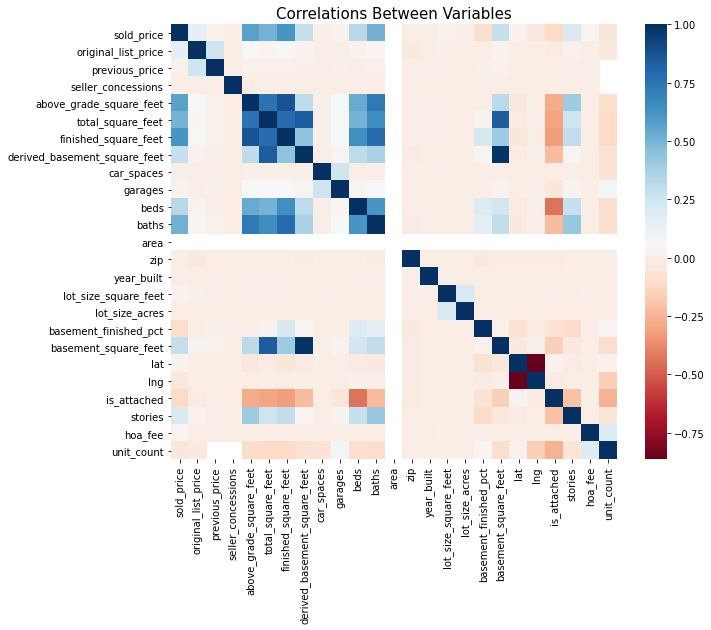

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(denver_list_clean.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [12]:
important_num_cols = list(denver_list_clean.corr()["sold_price"][
    (denver_list_clean.corr()["sold_price"] > 0.50) |
    (denver_list_clean.corr()["sold_price"] < -0.50)].index)

cat_cols = [
    "city", "state", "county", "structural_style", "property_type",
    "architecture", "structural_type", "zoned", "zip", "subdivision",
    "basement_finished_status", "basement_size", "basement_type",
    "seller_type", "hoa_name", "school_district", "approval_condition"
]

important_cols = important_num_cols + cat_cols

df = denver_list_clean[important_cols]


In [13]:
df = df.dropna()

In [14]:
df.columns

Index(['sold_price', 'above_grade_square_feet', 'total_square_feet',
       'finished_square_feet', 'baths', 'city', 'state', 'county',
       'structural_style', 'property_type', 'architecture', 'structural_type',
       'zoned', 'zip', 'subdivision', 'basement_finished_status',
       'basement_size', 'basement_type', 'seller_type', 'hoa_name',
       'school_district', 'approval_condition'],
      dtype='object')

In [15]:
X = df.drop("sold_price", axis=1)
y = df["sold_price"]

In [16]:
X = pd.get_dummies(X, columns=cat_cols)

In [17]:
important_num_cols.remove("sold_price")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [20]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

In [ ]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

In [ ]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

In [ ]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

In [ ]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

In [ ]:
models['Normalized RMSE'] = models["RMSE (Cross-Validation)"] / (max(df.sold_price) - min(df.sold_price))

In [ ]:
models.sort_values(by="Normalized RMSE") 